In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir(r'C:\aa_sem_i\PiPG_I\temat_6')

In [4]:
import re
def my_replace(s,character=', '):
    '''Replace all runs of whitespace with a single dash'''
    
    s = re.sub("\s+", character, s)
    return s

def readfile(input_path,value_starts,output_path):
    '''reading from input_path, checking initial value_starts and writing this line to output_path '''

    with open(input_path,'r') as r, open(output_path, 'w') as w:
        for line in r:
            wart = my_replace(line).split(',')
            if wart[0] == value_starts:
                w.writelines(wart+['\n'])

In [5]:
# Przygotowanie danych
readfile('igl17202.sp3.txt','PR08', 'glo_out.txt')
readfile('igs17202.sp3.txt','PG32', 'gps_out.txt')

glo_data = np.loadtxt('glo_out.txt', usecols=(1,2,3))
gps_data = np.loadtxt('gps_out.txt', usecols=(1,2,3))

readfile('igl17202.sp3.txt','*', 'glo_time.txt')
readfile('igs17202.sp3.txt','*', 'gps_time.txt')

glo_time = np.loadtxt('glo_time.txt', usecols=[x for x in range(4,7)])
gps_time = np.loadtxt('gps_time.txt', usecols=[x for x in range(4,7)])

s_glo = glo_time[:,0] + glo_time[:,1]/60 + glo_time[:,2]/3600
s_gps = gps_time[:,0] + gps_time[:,1]/60 + gps_time[:,2]/3600

R = 6371
ro = np.pi/180
fi_p = (50 + 3/60)*ro
la_p = (19 + 59/60)*ro

xp = R*np.cos(fi_p)*np.cos(la_p)
yp = R*np.cos(fi_p)*np.sin(la_p)
zp = R*np.sin(fi_p)

In [6]:
# Obliczenia
def obl_e(data):

    ro = 180/np.pi
    x,y,z = data[:,0],data[:,1],data[:,2]

    r = np.sqrt(x**2+y**2+z**2)
    print(r)
    d = np.sqrt((x-xp)**2 + (y-yp)**2 + (z-zp)**2)
    e = np.arcsin((r**2-R**2-d**2)/(2*R*d))
    
    return e*ro


e_glo = obl_e(glo_data)
e_gps = obl_e(gps_data)


def obl_az(data):

    ro = 180/np.pi
    x,y,z = data[:,0],data[:,1],data[:,2]

    p = np.sqrt(x*x+y*y)
    fi = np.arctan2(z,p)
    la = np.arctan2(y,x)
    
    delta_la = la - la_p
    
    gamma = np.arccos(np.sin(fi_p)*np.sin(fi) + np.cos(fi_p)*np.cos(fi)*np.cos(delta_la))
    cos_alfa = (np.sin(fi) - np.sin(fi_p)*np.cos(gamma))/(np.cos(fi_p)*np.sin(gamma))
    
    f = lambda i,k: np.arccos(i) if k > 0 else 2*np.pi - np.arccos(i)
    alfa = np.array([f(i,k) for i,k in zip(cos_alfa,delta_la)])
    return alfa*ro


alfa_glo = obl_az(glo_data)
alfa_gps = obl_az(gps_data)

[25550.37340653 25548.98138615 25546.8091779  25543.89484743
 25540.29039097 25536.06107003 25531.28449217 25526.04945251
 25520.4545174  25514.60636061 25508.61786597 25502.60601084
 25496.68955953 25490.98661844 25485.61209967 25480.67516714
 25476.27673521 25472.50710579 25469.44380755 25467.14974019
 25465.67166681 25465.03912563 25465.26377565 25466.33922834
 25468.24132939 25470.92889428 25474.34484853 25478.41772251
 25483.06345011 25488.18738445 25493.68647866 25499.4515488
 25505.36957273 25511.3259463  25517.20667289 25522.90042699
 25528.30048743 25533.30649943 25537.82607903 25541.77623576
 25545.08462501 25547.69063399 25549.54629087 25550.61701343
 25550.88217707 25550.3355148  25548.98532474 25546.85448167
 25543.9802448  25540.4138366  25536.21979459 25531.47507028
 25526.26788309 25520.69631349 25514.86664947 25508.89148049
 25502.88758343 25496.97361116 25491.2676463  25485.88466508
 25480.93398212 25476.51675853 25472.72363333 25469.63257064
 25467.30699675 25465.794

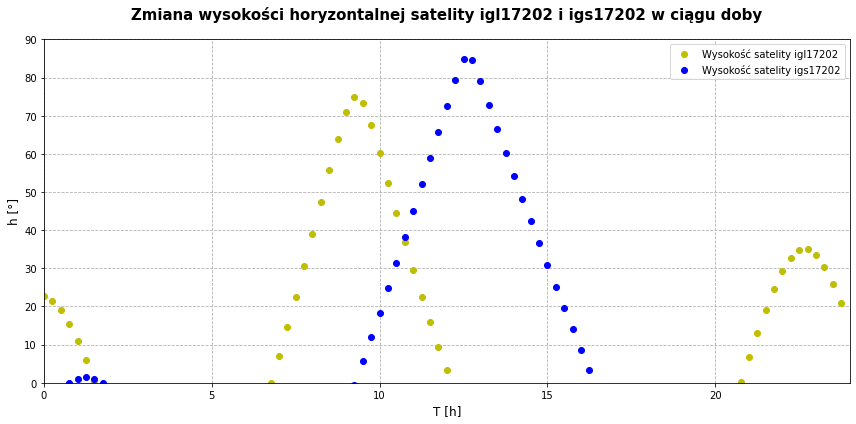

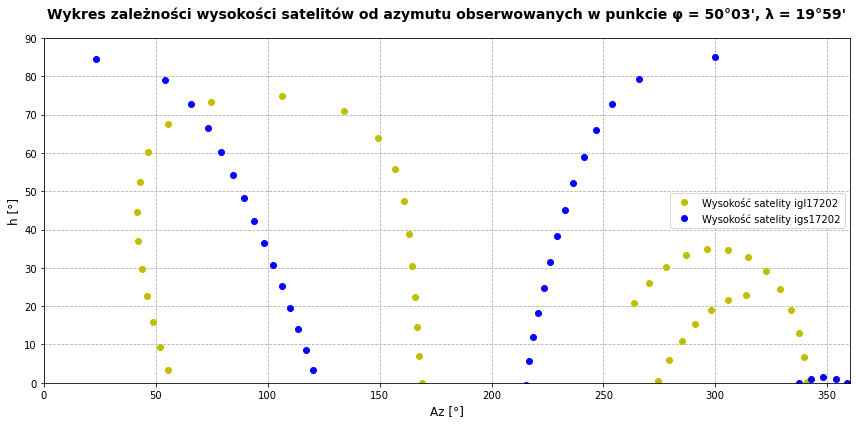

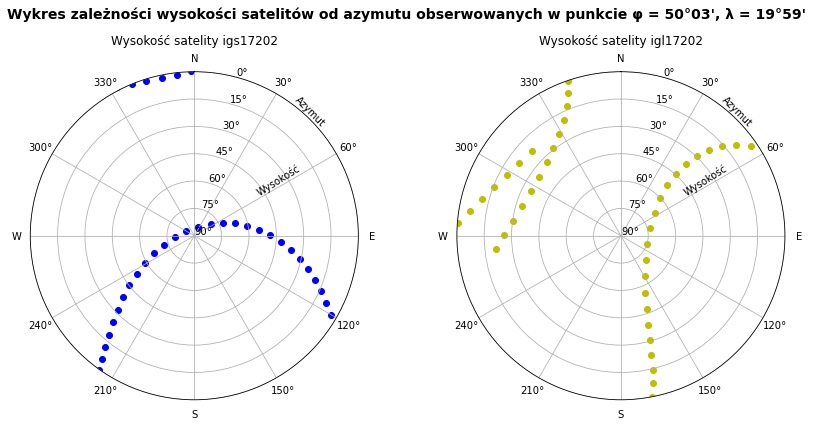

In [7]:
# Rysowanie wykresów

# Wykres 1
plt.figure(figsize=(12,6))
plt.title('Zmiana wysokości horyzontalnej satelity igl17202 i igs17202 w ciągu doby',fontsize = 15, pad = 20, fontweight = 'bold')
plt.xlabel('T [h]',fontsize = 12)
plt.ylabel('h [°]', fontsize = 12)
plt.xlim(0,24)
plt.ylim(0,90)

#trajektoria satelity
plt.plot(s_glo, e_glo, 'oy', label = 'Wysokość satelity igl17202')
plt.plot(s_gps, e_gps, 'ob', label = 'Wysokość satelity igs17202')
plt.grid(linestyle = '--')
plt.legend()
plt.tight_layout()
plt.savefig('Daniel_Cienkosz.jpg', dpi = 200)
plt.show()



# Wykres 2
plt.figure(figsize=(12,6))
plt.title("Wykres zależności wysokości satelitów od azymutu obserwowanych w punkcie φ = 50°03', λ = 19°59'",fontsize = 14, pad = 20, fontweight = 'bold')
plt.xlabel('Az [°]',fontsize = 12)
plt.ylabel('h [°]', fontsize = 12)
plt.xlim(0,360)
plt.ylim(0,90)

plt.plot(alfa_glo, e_glo, 'oy', label = 'Wysokość satelity igl17202')
plt.plot(alfa_gps, e_gps, 'ob', label = 'Wysokość satelity igs17202')
plt.grid(linestyle = '--')
plt.legend()
plt.tight_layout()
plt.savefig('Daniel_Cienkosz_2.jpg', dpi = 200)
plt.show()



#Wykres 3
fig, (ax, ax1) = plt.subplots(1,2,subplot_kw={'projection': 'polar'},figsize = (12,6))

def plot_ax(ax, alfa, e, color, sat):
    ax.set_theta_zero_location('N')
    ax.scatter(alfa*ro, e, c = color)
    ax.set_theta_direction(-1)
    ax.set_ylim((90,0))
    ax.set_rlabel_position(15)
    ax.grid(True)
    ax.set_thetagrids(np.arange(0, 360, 30), ('N','30°','60°','E','120°','150°', 'S','210°','240°','W', '300°','330°'))
    ax.set_rgrids(np.arange(0,91,15), [f'{i}°' for i in list(range(0,91,15))])
    ax.set_title(f'Wysokość satelity {sat}', va='bottom')
    ax.text(51,9, 'Azymut', rotation = -45)
    ax.text(51.25,50, 'Wysokość', rotation = 32)

plot_ax(ax, alfa_gps, e_gps, 'b', 'igs17202')
plot_ax(ax1, alfa_glo, e_glo, 'y', 'igl17202')

fig.tight_layout()
fig.suptitle("Wykres zależności wysokości satelitów od azymutu obserwowanych w punkcie φ = 50°03', λ = 19°59'", fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.savefig('Daniel_Cienkosz_3.jpg', dpi = 200)
plt.show()

In [6]:
# Here you create the method of the node object that will return the generator
def _get_child_candidates(self, distance, min_dist, max_dist):

    # Here is the code that will be called each time you use the generator object:

    # If there is still a child of the node object on its left
    # AND if the distance is ok, return the next child
    if self._leftchild and distance - max_dist < self._median:
        yield self._leftchild

    # If there is still a child of the node object on its right
    # AND if the distance is ok, return the next child
    if self._rightchild and distance + max_dist >= self._median:
        yield self._rightchild

    # If the function arrives here, the generator will be considered empty
    # there is no more than two values: the left and the right children

In [7]:
# Create an empty list and a list with the current object reference
result, candidates = list(), [1]

# Loop on candidates (they contain only one element at the beginning)
while candidates:

    # Get the last candidate and remove it from the list
    node = candidates.pop()

    # Get the distance between obj and the candidate
    distance = node._get_dist(obj)

    # If distance is ok, then you can fill the result
    if distance <= max_dist and distance >= min_dist:
        result.extend(node._values)

    # Add the children of the candidate in the candidate's list
    # so the loop will keep running until it will have looked
    # at all the children of the children of the children, etc. of the candidate
    candidates.extend(node._get_child_candidates(distance, min_dist, max_dist))

return result

AttributeError: 'int' object has no attribute '_get_dist'